<a href="https://colab.research.google.com/github/Masciel-Sevilla/modelos/blob/main/S-Pro-V3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# Paso 1: Descomprimir el dataset (esto solo se hace una vez)
import os
import zipfile

zip_path = '/content/Balanced.zip'
extract_path = '/content/'

# Solo descomprimir si no se ha hecho antes
if not os.path.exists(os.path.join(extract_path, 'Balanced')):
    print(f"Descomprimiendo {zip_path}...")
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("¡Descompresión completada!")
else:
    print("La carpeta 'Balanced' ya existe. Omitiendo descompresión.")

Descomprimiendo /content/Balanced.zip...
¡Descompresión completada!


Creando datasets de entrenamiento y validación...


Model: "EfficientWeedDetectionModel_S"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_12      │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ EfficientNetV2S_Ba… │ [(None, 64, 64,   │ 20,331,360 │ input_layer_12[0… │
│ (Functional)        │ 24), (None, 32,   │            │                   │
│                     │ 32, 48), (None,   │            │                   │
│                     │ 16, 16, 64),      │            │                   │
│                     │ (None, 8, 8,      │            │                   │
│                     │ 960), (None, 4,   │            │                   │
│                     │ 4, 1280)]         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ aspp_module_6       │ (None, 4, 4, 192) │  7,315,968 │ EfficientNetV2S_… │
│ (ASPPModule)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ deformable_attenti… │ (None, 4, 4, 192) │     76,992 │ aspp_module_6[0]… │
│ (DeformableAttenti… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_30 │ (None, 8, 8, 96)  │     73,728 │ deformable_atten… │
│ (Conv2DTranspose)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ conv2d_transpose… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_90 (Conv2D)  │ (None, 8, 8, 96)  │     92,160 │ EfficientNetV2S_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_149 (ReLU)    │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ conv2d_90[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_59          │ (None, 8, 8, 96)  │          0 │ re_lu_149[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_150 (ReLU)    │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_71      │ (None, 8, 8, 192) │          0 │ dropout_59[0][0], │
│ (Concatenate)       │                   │            │ re_lu_150[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ separable_conv2d_24 │ (None, 8, 8, 96)  │     20,160 │ concatenate_71[0… │
│ (SeparableConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 8, 8, 96)  │        384 │ separable_conv2d… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_151 (ReLU)    │ (None, 8, 8, 96)  │          0 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_60          │ (None, 8, 8, 96)  │          0 │ re_lu_151[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 28,010,298 (106.85 MB)

 Trainable params: 27,851,770 (106.25 MB)

 Non-trainable params: 158,528 (619.25 KB)

Iniciando entrenamiento para el modelo 'Small' con BATCH_SIZE=16...
Epoch 1/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1466 - dice_coefficient: 0.0883 - iou_metric: 0.0799 - loss: 0.9261
Epoch 1: val_iou_metric improved from -inf to 0.16629, saving model to efficient_weed_model_S_best.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 220s 289ms/step - accuracy: 0.1468 - dice_coefficient: 0.0883 - iou_metric: 0.0800 - loss: 0.9256 - val_accuracy: 0.2868 - val_dice_coefficient: 0.0868 - val_iou_metric: 0.1663 - val_loss: 0.8668 - learning_rate: 1.0000e-04
Epoch 2/150
105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.2643 - dice_coefficient: 0.1117 - iou_metric: 0.1569 - loss: 0.7763
Epoch 2: val_iou_metric improved from 0.16629 to 0.32380, saving model to efficient_weed_model_S_best.keras
105/105 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.2646 - dice_coefficient: 0.1118 - iou_metric: 0.1571 - loss: 0.7760 - val_accuracy: 0.4903 - val_dice_coefficient: 0.0911 - val_iou_metri

/usr/local/lib/python3.11/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'aspp_module_6', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Se encontraron 210 imágenes de test.
Creando dataset de test...

--- EVALUACIÓN FINAL EN EL CONJUNTO DE TEST ---
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 511ms/step - accuracy: 0.9656 - dice_coefficient: 0.6999 - iou_metric: 0.9344 - loss: 0.1670

## MÉTRICAS DE TEST - MODELO 'S' ##
Test Loss: 0.1540
Test Dice Coefficient: 0.7023
Test mIoU: 0.9397
Test Global Accuracy: 0.9685

Calculando IoU por clase en el conjunto de test...

## IoU por Clase (Test) ##
IoU for Background: 0.9543
IoU for Cow-tongue: 0.9065
IoU for Dandelion: 0.9027
IoU for Kikuyo: 0.9020
IoU for Other: 0.6778
IoU for Potato: 0.9067

Promedio de IoU por clase: 0.8750
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


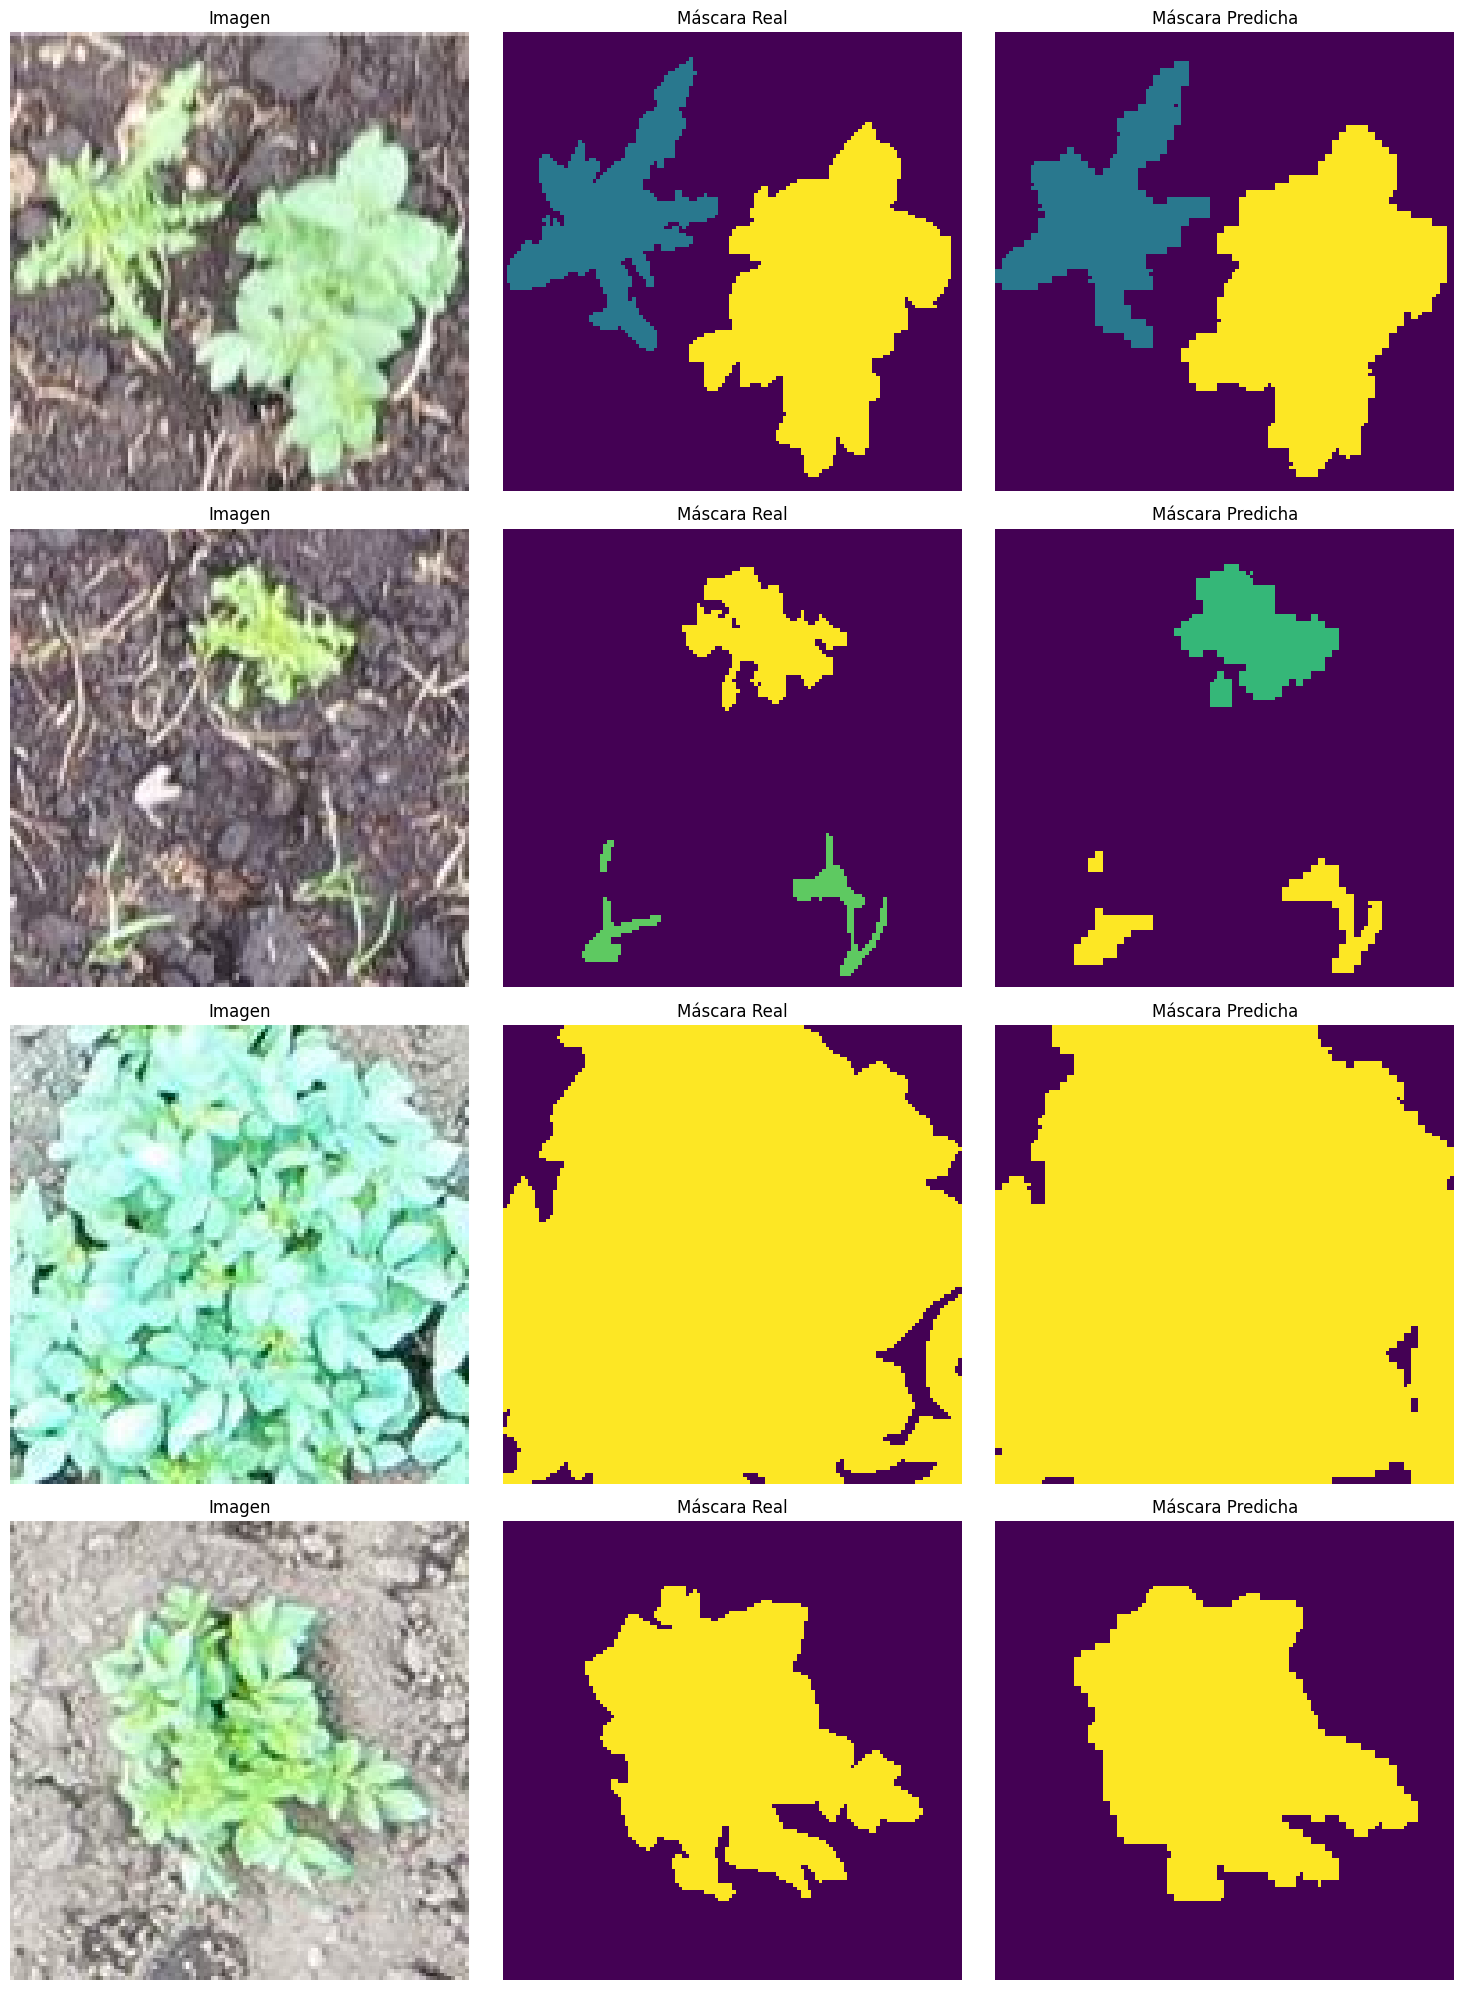

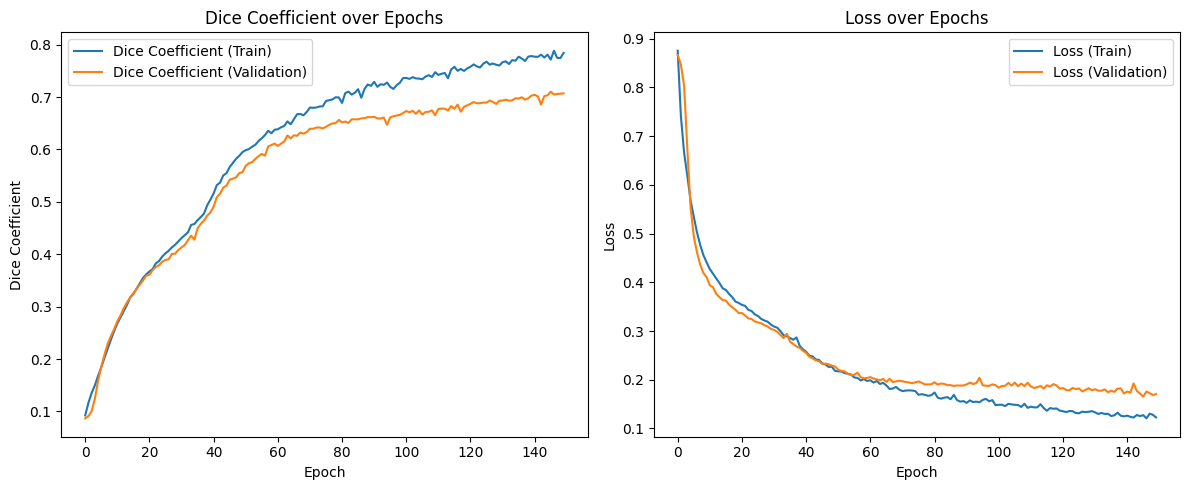

In [9]:
import tensorflow as tf
from tensorflow.keras import layers, Model
import numpy as np
import matplotlib.pyplot as plt
import os
from glob import glob

# Configuración del modelo
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 6
BATCH_SIZE = 16
EPOCHS = 150
LEARNING_RATE = 1e-4

# Paths
BASE_PATH = './Balanced'
TRAIN_IMAGES_PATH = os.path.join(BASE_PATH, 'train/images')
TRAIN_MASKS_PATH = os.path.join(BASE_PATH, 'train/masks')
VAL_IMAGES_PATH = os.path.join(BASE_PATH, 'val/images')
VAL_MASKS_PATH = os.path.join(BASE_PATH, 'val/masks')
TEST_IMAGES_PATH = os.path.join(BASE_PATH, 'test/images')
TEST_MASKS_PATH = os.path.join(BASE_PATH, 'test/masks')

# --- Módulos y Arquitectura del Modelo ---
class ASPPModule(layers.Layer):
    def __init__(self, filters=192, **kwargs):
        super(ASPPModule, self).__init__(**kwargs)
        self.filters = filters
        self.conv_1x1 = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1 = layers.BatchNormalization()
        self.relu_1x1 = layers.ReLU()
        self.conv_3x3_6 = layers.Conv2D(filters, 3, padding='same', dilation_rate=6, use_bias=False)
        self.bn_3x3_6 = layers.BatchNormalization()
        self.relu_3x3_6 = layers.ReLU()
        self.conv_3x3_12 = layers.Conv2D(filters, 3, padding='same', dilation_rate=12, use_bias=False)
        self.bn_3x3_12 = layers.BatchNormalization()
        self.relu_3x3_12 = layers.ReLU()
        self.conv_3x3_18 = layers.Conv2D(filters, 3, padding='same', dilation_rate=18, use_bias=False)
        self.bn_3x3_18 = layers.BatchNormalization()
        self.relu_3x3_18 = layers.ReLU()
        self.global_avg_pool = layers.GlobalAveragePooling2D(keepdims=True)
        self.conv_1x1_gap = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_1x1_gap = layers.BatchNormalization()
        self.relu_1x1_gap = layers.ReLU()
        self.conv_final = layers.Conv2D(filters, 1, padding='same', use_bias=False)
        self.bn_final = layers.BatchNormalization()
        self.relu_final = layers.ReLU()
        self.dropout = layers.Dropout(0.2)

    def call(self, inputs, training=None):
        input_shape = tf.shape(inputs)
        conv_1x1 = self.relu_1x1(self.bn_1x1(self.conv_1x1(inputs), training=training))
        conv_3x3_6 = self.relu_3x3_6(self.bn_3x3_6(self.conv_3x3_6(inputs), training=training))
        conv_3x3_12 = self.relu_3x3_12(self.bn_3x3_12(self.conv_3x3_12(inputs), training=training))
        conv_3x3_18 = self.relu_3x3_18(self.bn_3x3_18(self.conv_3x3_18(inputs), training=training))
        gap = self.global_avg_pool(inputs)
        gap = self.relu_1x1_gap(self.bn_1x1_gap(self.conv_1x1_gap(gap), training=training))
        gap = tf.image.resize(gap, [input_shape[1], input_shape[2]], method='bilinear')
        concat = layers.Concatenate()([conv_1x1, conv_3x3_6, conv_3x3_12, conv_3x3_18, gap])
        output = self.relu_final(self.bn_final(self.conv_final(concat), training=training))
        output = self.dropout(output, training=training)
        return output

class DeformableAttention(layers.Layer):
    def __init__(self, filters, **kwargs):
        super(DeformableAttention, self).__init__(**kwargs)
        self.filters = filters

    def build(self, input_shape):
        self.attention_conv = layers.Conv2D(self.filters, 1, padding='same', activation='sigmoid', name='attention_weights_conv', use_bias=False)
        self.bn_attention = layers.BatchNormalization()
        self.feature_conv = layers.SeparableConv2D(self.filters, 3, padding='same', name='feature_processing_conv', use_bias=False)
        self.bn_feature = layers.BatchNormalization()
        self.relu_feature = layers.ReLU()
        super(DeformableAttention, self).build(input_shape)

    def call(self, inputs, training=None):
        attention_weights = self.bn_attention(self.attention_conv(inputs), training=training)
        features = self.relu_feature(self.bn_feature(self.feature_conv(inputs), training=training))
        attended_features = features * attention_weights
        return attended_features

def create_efficient_backbone(input_shape):
    """Crea el backbone usando EfficientNetV2S y extrae los mapas de características."""
    base_model = tf.keras.applications.EfficientNetV2S( # <-- CAMBIO A VERSIÓN 'S'
        input_shape=input_shape,
        weights='imagenet',
        include_top=False
    )
    base_model.trainable = True

    # Nombres de capa específicos para EfficientNetV2S
    layer_names = [
        'block1a_project_activation',
        'block2c_add',
        'block3c_add',
        'block6a_expand_activation',
        'top_activation'
    ]
    outputs = [base_model.get_layer(name).output for name in layer_names]
    return Model(inputs=base_model.input, outputs=outputs, name='EfficientNetV2S_Backbone')

def create_weed_detection_model(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), num_classes=NUM_CLASSES):
    # La estructura del decodificador es la misma
    inputs = layers.Input(shape=input_shape)
    backbone = create_efficient_backbone(input_shape)
    feat1_out, feat2_out, feat3_out, feat4_out, feat5_out = backbone(inputs)
    deep_features = feat5_out
    aspp_filters = 192
    aspp_features = ASPPModule(filters=aspp_filters)(deep_features)
    attended_features = DeformableAttention(filters=aspp_filters)(aspp_features)
    decoder_up1 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(attended_features)
    decoder_up1 = layers.BatchNormalization()(decoder_up1)
    decoder_up1 = layers.ReLU()(decoder_up1)
    decoder_up1 = layers.Dropout(0.2)(decoder_up1)
    feat4_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat4_out)
    feat4_processed = layers.BatchNormalization()(feat4_processed)
    feat4_processed = layers.ReLU()(feat4_processed)
    decoder_concat_8x8 = layers.Concatenate()([decoder_up1, feat4_processed])
    decoder_conv_8x8 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_8x8)
    decoder_conv_8x8 = layers.BatchNormalization()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.ReLU()(decoder_conv_8x8)
    decoder_conv_8x8 = layers.Dropout(0.2)(decoder_conv_8x8)
    decoder_up2 = layers.Conv2DTranspose(96, 2, strides=2, padding='same', use_bias=False)(decoder_conv_8x8)
    decoder_up2 = layers.BatchNormalization()(decoder_up2)
    decoder_up2 = layers.ReLU()(decoder_up2)
    decoder_up2 = layers.Dropout(0.2)(decoder_up2)
    feat3_processed = layers.Conv2D(96, 1, padding='same', use_bias=False)(feat3_out)
    feat3_processed = layers.BatchNormalization()(feat3_processed)
    feat3_processed = layers.ReLU()(feat3_processed)
    decoder_concat_16x16 = layers.Concatenate()([decoder_up2, feat3_processed])
    decoder_conv_16x16 = layers.SeparableConv2D(96, 3, padding='same', use_bias=False)(decoder_concat_16x16)
    decoder_conv_16x16 = layers.BatchNormalization()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.ReLU()(decoder_conv_16x16)
    decoder_conv_16x16 = layers.Dropout(0.2)(decoder_conv_16x16)
    decoder_up3 = layers.Conv2DTranspose(48, 2, strides=2, padding='same', use_bias=False)(decoder_conv_16x16)
    decoder_up3 = layers.BatchNormalization()(decoder_up3)
    decoder_up3 = layers.ReLU()(decoder_up3)
    decoder_up3 = layers.Dropout(0.2)(decoder_up3)
    feat2_processed = layers.Conv2D(48, 1, padding='same', use_bias=False)(feat2_out)
    feat2_processed = layers.BatchNormalization()(feat2_processed)
    feat2_processed = layers.ReLU()(feat2_processed)
    decoder_concat_32x32 = layers.Concatenate()([decoder_up3, feat2_processed])
    decoder_conv_32x32 = layers.SeparableConv2D(48, 3, padding='same', use_bias=False)(decoder_concat_32x32)
    decoder_conv_32x32 = layers.BatchNormalization()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.ReLU()(decoder_conv_32x32)
    decoder_conv_32x32 = layers.Dropout(0.2)(decoder_conv_32x32)
    decoder_up4 = layers.Conv2DTranspose(24, 2, strides=2, padding='same', use_bias=False)(decoder_conv_32x32)
    decoder_up4 = layers.BatchNormalization()(decoder_up4)
    decoder_up4 = layers.ReLU()(decoder_up4)
    decoder_up4 = layers.Dropout(0.2)(decoder_up4)
    feat1_processed = layers.Conv2D(24, 1, padding='same', use_bias=False)(feat1_out)
    feat1_processed = layers.BatchNormalization()(feat1_processed)
    feat1_processed = layers.ReLU()(feat1_processed)
    decoder_concat_64x64 = layers.Concatenate()([decoder_up4, feat1_processed])
    decoder_conv_64x64 = layers.SeparableConv2D(24, 3, padding='same', use_bias=False)(decoder_concat_64x64)
    decoder_conv_64x64 = layers.BatchNormalization()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.ReLU()(decoder_conv_64x64)
    decoder_conv_64x64 = layers.Dropout(0.2)(decoder_conv_64x64)
    outputs = layers.Conv2DTranspose(NUM_CLASSES, 2, strides=2, padding='same', use_bias=False)(decoder_conv_64x64)
    outputs = layers.Conv2D(NUM_CLASSES, 1, padding='same', activation='softmax', name='segmentation_output')(outputs)
    model = Model(inputs=inputs, outputs=outputs, name='EfficientWeedDetectionModel_S') # <-- Nombre cambiado
    return model

# --- Métricas y Función de Pérdida con balanceo ---
def dice_coefficient(y_true, y_pred, smooth=1e-6):
    y_true_f = tf.reshape(tf.cast(y_true, tf.float32), [-1, NUM_CLASSES])
    y_pred_f = tf.reshape(tf.cast(y_pred, tf.float32), [-1, NUM_CLASSES])
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    dice_scores = (2. * intersection + smooth) / (tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0) + smooth)
    return tf.reduce_mean(dice_scores)

def focal_loss(gamma=2.0, alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        y_true = tf.cast(y_true, tf.float32)
        epsilon = tf.keras.backend.epsilon()
        y_pred = tf.clip_by_value(y_pred, epsilon, 1. - epsilon)
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.pow(1 - y_pred, gamma) * cross_entropy
        return loss
    return focal_loss_fixed

def dice_loss(y_true, y_pred):
    return 1 - dice_coefficient(y_true, y_pred)

def combined_loss(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    class_weights = tf.constant([0.4, 4.0, 3.5, 1.0, 2.0, 4.0])
    f_loss_per_pixel_per_class = focal_loss(gamma=2.0, alpha=0.75)(y_true, y_pred)
    weighted_f_loss = f_loss_per_pixel_per_class * class_weights
    f_loss_reduced = tf.reduce_sum(weighted_f_loss, axis=-1)
    f_loss_mean = tf.reduce_mean(f_loss_reduced)
    d_loss = dice_loss(y_true, y_pred)
    # Usamos el balance que funcionó: 60% Focal Loss, 40% Dice Loss
    return (0.6 * f_loss_mean) + (0.4 * d_loss)

def iou_metric(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2, 3])
    union = tf.reduce_sum(y_true, axis=[1, 2, 3]) + tf.reduce_sum(y_pred, axis=[1, 2, 3]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou)

def iou_per_class(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.one_hot(tf.argmax(y_pred, axis=-1), depth=NUM_CLASSES)
    intersection = tf.reduce_sum(y_true * y_pred, axis=[1, 2])
    union = tf.reduce_sum(y_true, axis=[1, 2]) + tf.reduce_sum(y_pred, axis=[1, 2]) - intersection
    iou = tf.where(tf.equal(union, 0), 1.0, intersection / union)
    return tf.reduce_mean(iou, axis=0)

# --- Carga de Datos y Aumento con corrección ---
def load_and_preprocess_data(image_paths, mask_paths, augment=False):
    def load_image_only(image_path):
        image = tf.io.read_file(image_path)
        image = tf.image.decode_image(image, channels=3, expand_animations=False)
        image.set_shape([None, None, 3])
        image = tf.image.resize(image, [IMG_HEIGHT, IMG_WIDTH], method='bilinear')
        return tf.cast(image, tf.float32)

    def load_mask_only(mask_path):
        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [IMG_HEIGHT, IMG_WIDTH], method='nearest')
        mask = tf.cast(mask, tf.int32)
        mask = tf.squeeze(mask, axis=-1)
        mask = tf.one_hot(mask, NUM_CLASSES)
        return mask

    def augment_and_preprocess(image, mask):
        if tf.random.uniform([]) > 0.5:
            image, mask = tf.image.flip_left_right(image), tf.image.flip_left_right(mask)
        if tf.random.uniform([]) > 0.5:
            image, mask = tf.image.flip_up_down(image), tf.image.flip_up_down(mask)

        k_rot = tf.random.uniform(shape=[], minval=0, maxval=4, dtype=tf.int32)
        image, mask = tf.switch_case(k_rot, branch_fns={
            0: lambda: (image, mask),
            1: lambda: (tf.image.rot90(image, k=1), tf.image.rot90(mask, k=1)),
            2: lambda: (tf.image.rot90(image, k=2), tf.image.rot90(mask, k=2)),
            3: lambda: (tf.image.rot90(image, k=3), tf.image.rot90(mask, k=3)),
        }, default=lambda: (image, mask))

        image = tf.image.random_brightness(image, max_delta=0.4 * 255)
        image = tf.image.random_contrast(image, lower=0.6, upper=1.4)
        image = tf.image.random_hue(image, max_delta=0.15)
        image = tf.image.random_saturation(image, lower=0.6, upper=1.4)
        image = tf.clip_by_value(image, 0.0, 255.0)
        image = tf.keras.applications.efficientnet_v2.preprocess_input(image)
        return image, mask

    image_ds = tf.data.Dataset.from_tensor_slices(image_paths).map(load_image_only, num_parallel_calls=tf.data.AUTOTUNE)
    mask_ds = tf.data.Dataset.from_tensor_slices(mask_paths).map(load_mask_only, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = tf.data.Dataset.zip((image_ds, mask_ds))
    if augment:
        dataset = dataset.shuffle(buffer_size=1000).map(augment_and_preprocess, num_parallel_calls=tf.data.AUTOTUNE)
    else:
        dataset = dataset.map(lambda img, mask: (tf.keras.applications.efficientnet_v2.preprocess_input(img), mask), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
    return dataset

# --- Entrenamiento del Modelo ---
def train_model(train_dataset, val_dataset, model_save_path='efficient_weed_model_S.keras'):
    model = create_weed_detection_model()
    model.summary()

    optimizer = tf.keras.optimizers.AdamW(
        learning_rate=LEARNING_RATE,
        weight_decay=1e-5
    )

    model.compile(
        optimizer=optimizer,
        loss=combined_loss,
        metrics=[dice_coefficient, iou_metric, 'accuracy']
    )

    callbacks = [
        tf.keras.callbacks.ModelCheckpoint(model_save_path, monitor='val_iou_metric', save_best_only=True, mode='max', verbose=1),
        tf.keras.callbacks.EarlyStopping(monitor='val_iou_metric', patience=50, mode='max', restore_best_weights=True),
        tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=20, min_lr=1e-7, verbose=1)
    ]

    print(f"Iniciando entrenamiento para el modelo 'Small' con BATCH_SIZE={BATCH_SIZE}...")
    history = model.fit(
        train_dataset,
        epochs=EPOCHS,
        validation_data=val_dataset,
        callbacks=callbacks,
        verbose=1
    )
    return model, history

# --- Bloque Principal de Ejecución ---
if __name__ == "__main__":
    train_image_paths = sorted(glob(os.path.join(TRAIN_IMAGES_PATH, '*.jpg')))
    train_mask_paths = sorted(glob(os.path.join(TRAIN_MASKS_PATH, '*.png')))
    val_image_paths = sorted(glob(os.path.join(VAL_IMAGES_PATH, '*.jpg')))
    val_mask_paths = sorted(glob(os.path.join(VAL_MASKS_PATH, '*.png')))

    print("Creando datasets de entrenamiento y validación...")
    train_ds = load_and_preprocess_data(train_image_paths, train_mask_paths, augment=True)
    val_ds = load_and_preprocess_data(val_image_paths, val_mask_paths, augment=False)

    model_save_path = 'efficient_weed_model_S_best.keras' # <-- Nombre de archivo cambiado
    model, history = train_model(train_ds, val_ds, model_save_path=model_save_path)

    print("\n--- Entrenamiento Finalizado ---")
    print(f"El mejor modelo se ha guardado en: {model_save_path}")

    print("\nCargando el mejor modelo guardado para la evaluación en el conjunto de test...")
    best_model = tf.keras.models.load_model(
        model_save_path,
        custom_objects={
            'ASPPModule': ASPPModule,
            'DeformableAttention': DeformableAttention,
            'combined_loss': combined_loss,
            'dice_coefficient': dice_coefficient,
            'iou_metric': iou_metric,
            'dice_loss': dice_loss
        }
    )

    test_image_paths = sorted(glob(os.path.join(TEST_IMAGES_PATH, '*.jpg')))
    test_mask_paths = sorted(glob(os.path.join(TEST_MASKS_PATH, '*.png')))

    if not test_image_paths:
        print("\nADVERTENCIA: No se encontraron imágenes en el directorio de test. Saltando la evaluación de test.")
    else:
        print(f"Se encontraron {len(test_image_paths)} imágenes de test.")
        print("Creando dataset de test...")
        test_ds = load_and_preprocess_data(test_image_paths, test_mask_paths, augment=False)

        print("\n--- EVALUACIÓN FINAL EN EL CONJUNTO DE TEST ---")
        test_metrics = best_model.evaluate(test_ds)

        print("\n## MÉTRICAS DE TEST - MODELO 'S' ##") # <-- Título cambiado
        print(f"Test Loss: {test_metrics[0]:.4f}")
        print(f"Test Dice Coefficient: {test_metrics[1]:.4f}")
        print(f"Test mIoU: {test_metrics[2]:.4f}")
        print(f"Test Global Accuracy: {test_metrics[3]:.4f}")

        print("\nCalculando IoU por clase en el conjunto de test...")
        iou_per_class_values = []
        for images_batch, masks_batch in test_ds:
            predictions_batch = best_model.predict(images_batch, verbose=0)
            iou_per_class_values.append(iou_per_class(masks_batch, predictions_batch))

        iou_per_class_values = tf.reduce_mean(tf.stack(iou_per_class_values), axis=0).numpy()
        class_names = ['Background', 'Cow-tongue', 'Dandelion', 'Kikuyo', 'Other', 'Potato']
        print("\n## IoU por Clase (Test) ##")
        for i, iou in enumerate(iou_per_class_values):
            print(f"IoU for {class_names[i]}: {iou:.4f}")


        print(f"\nPromedio de IoU por clase: {np.mean(iou_per_class_values):.4f}")

        # Mostrar ejemplos de máscaras reales y predichas
        for images_batch, masks_batch in test_ds.take(1):
            predictions_batch = best_model.predict(images_batch)
            plot_sample_masks(images_batch.numpy(), masks_batch.numpy(), predictions_batch)

        # Gráficas de Dice Coefficient y Loss durante el entrenamiento
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['dice_coefficient'], label='Dice Coefficient (Train)')
        plt.plot(history.history['val_dice_coefficient'], label='Dice Coefficient (Validation)')
        plt.title('Dice Coefficient over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Dice Coefficient')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Loss (Train)')
        plt.plot(history.history['val_loss'], label='Loss (Validation)')
        plt.title('Loss over Epochs')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()
